In [1]:
!pip install umap-learn hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.2 MB/s eta 0:00:0000:01
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [2]:
from umap import UMAP
from hdbscan import HDBSCAN
import numpy as np


2024-07-24 16:58:17.125682: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 16:58:17.125876: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 16:58:17.279166: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
images = np.load("/kaggle/input/forex-flattened-images2/flattened_images.npy")

In [5]:
embeddings = UMAP().fit_transform(images)

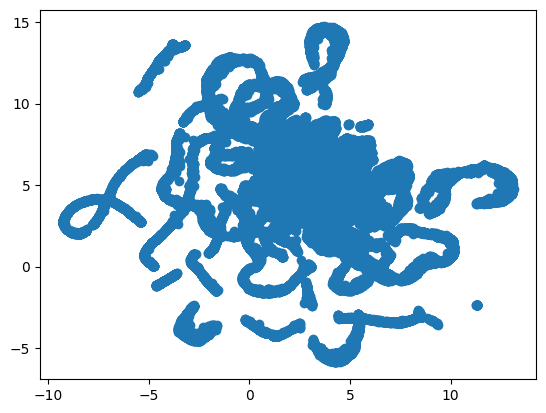

In [6]:
plt.scatter(embeddings[:, 0], embeddings[:, 1])

In [39]:
clusterer = HDBSCAN(min_cluster_size=300, min_samples=3)

In [40]:
cluster_labels = clusterer.fit_predict(embeddings)

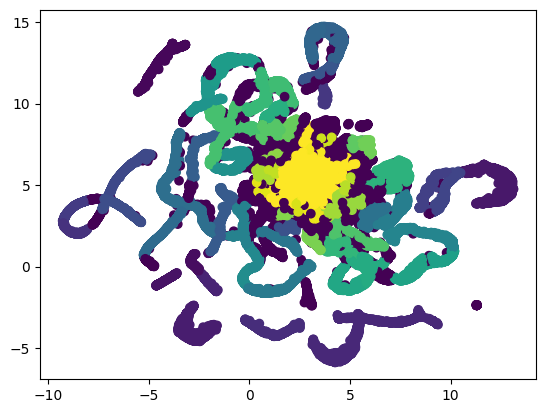

In [41]:
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=cluster_labels)

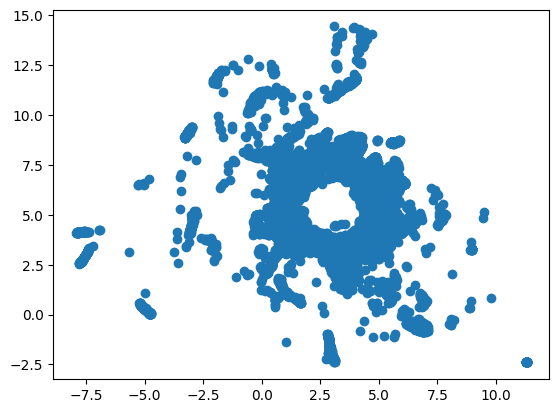

In [43]:
sum()

In [47]:
np.save("embeddings.npy", embeddings)
np.save("labels.npy", cluster_labels)

In [48]:
np.save("images.npy", images)

(array([18312.,  5201.,  3837.,  5692.,  4354.,  4128.,  4091.,  4387.,
         3718., 26280.]),
 array([-1. ,  5.4, 11.8, 18.2, 24.6, 31. , 37.4, 43.8, 50.2, 56.6, 63. ]),
 <BarContainer object of 10 artists>)

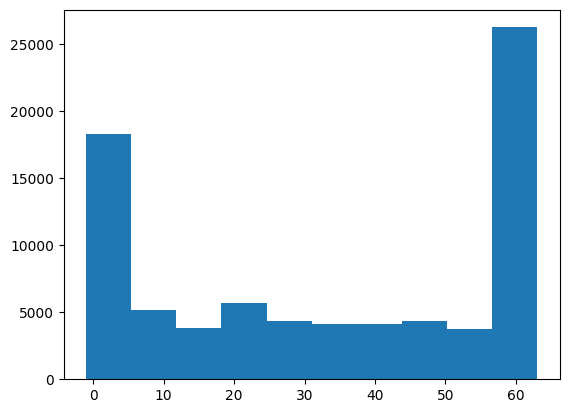

In [49]:
plt.hist(cluster_labels)

In [53]:
unique, counts = np.unique(cluster_labels, return_counts=True)

In [67]:
counts.mean()

1230.7692307692307

In [75]:
unique

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [73]:
count_dict = {item: 1250 if count > 1250 else count for item, count in zip(unique, counts) if item !=-1}

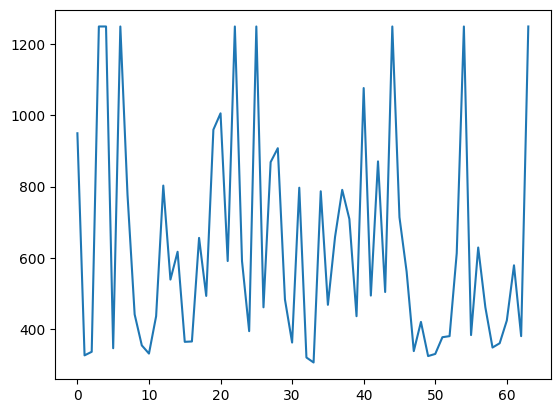

In [77]:
plt.plot(count_dict.keys(), count_dict.values())

In [82]:
sum(list(count_dict.values()))

40600

In [89]:
np.array(list(count_dict.values())).argmax()

3

In [91]:
images_label_3 = images[cluster_labels == 3]

In [92]:
images_label_3.shape

(2041, 8192)

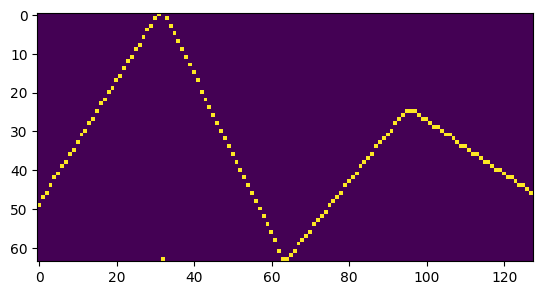

In [95]:
plt.imshow(images_label_3[0].reshape(64, 128))

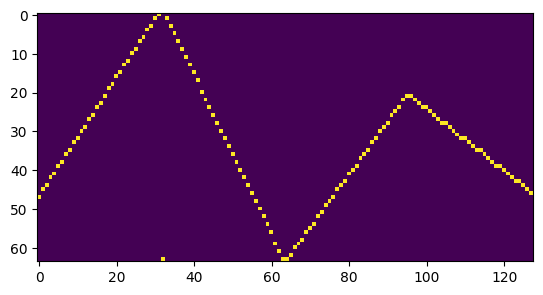

In [96]:
plt.imshow(images_label_3[100].reshape(64, 128))

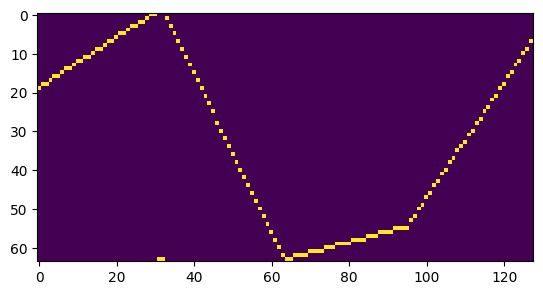

In [99]:
plt.imshow(images_label_3[403].reshape(64, 128))

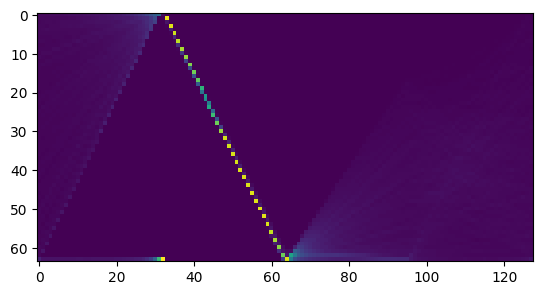

In [106]:
plt.imshow(images_label_3.mean(axis=0).reshape(64, 128))

In [107]:
images_label_0 = images[cluster_labels == 0]

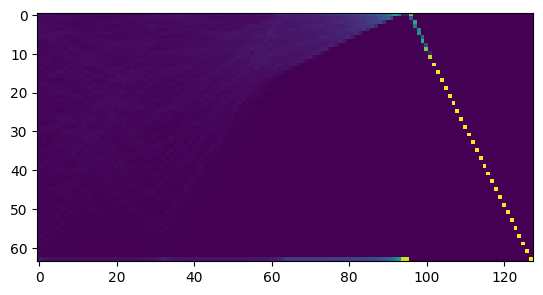

In [114]:
plt.imshow(images_label_0.mean(axis=0).reshape(64, 128))

In [115]:
images_label_1 = images[cluster_labels == 1]

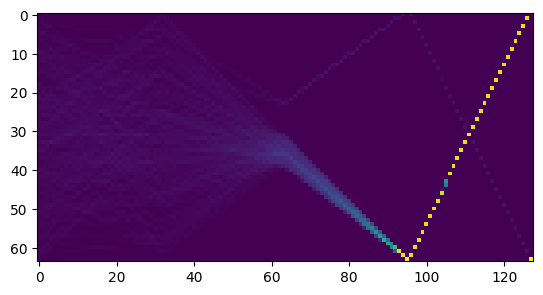

In [116]:
plt.imshow(images_label_1.mean(axis=0).reshape(64, 128))

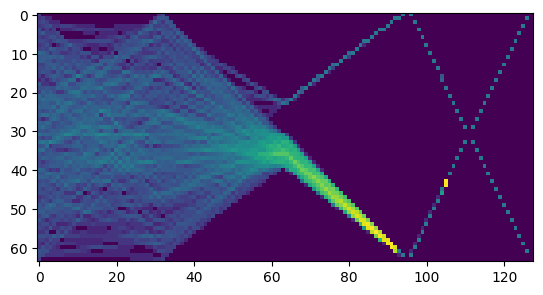

In [117]:
plt.imshow(images_label_1.std(axis=0).reshape(64, 128))

In [118]:
images_label_60 = images[cluster_labels == 60]

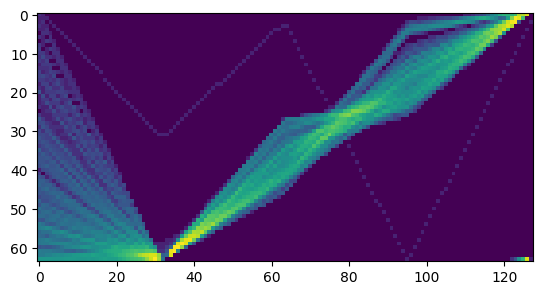

In [124]:
plt.imshow(images_label_60.std(axis=0).reshape(64, 128))

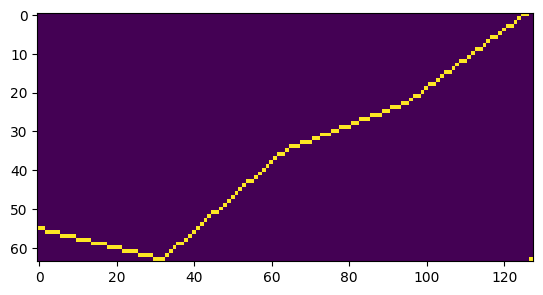

In [129]:
plt.imshow(images_label_60[400].reshape(64, 128))